In [1]:
from util import load_data, fdr, plot_report
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import ChainMap

In [2]:
x_train, x_test, y_train, y_test = load_data('var_w1.csv')
x_train.head()

,ssn_name_dob_count_7,ssn_dob_count_0_by_14,name_dob_count_0_by_14,ssn_firstname_count_0_by_14,name_count_7,fulladdress_homephone_count_0_by_14,name_day_since,homephone_count_7,homephone_count_3,address_count_1_by_7,...,fulladdress_homephone_count_7,ssn_firstname_count_7,ssn_lastname_count_0_by_14,ssn_lastname_day_since,ssn_name_count_7,name_count_14,ssn_count_7,ssn_dob_count_7,ssn_lastname_count_7,ssn_name_day_since
327712,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.212791,0.055132,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-0.417605,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.418127
139087,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.874519,0.879479,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-1.083253,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-1.083771
595836,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,0.713630,1.703825,1.799751,0.103441,...,-0.057263,-0.057185,0.123458,0.514303,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,0.513774
152098,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.827253,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-1.035707,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-1.036225
216846,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-1.120304,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-1.140309,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-1.140826


In [3]:
rf = RandomForestClassifier(verbose=1)
params = {'n_estimators': [25, 50, 100],
          'max_depth': [2, 5, 10, 15],
          'class_weight': ['balanced', None, 'balanced_subsample']}
grid = GridSearchCV(rf, params, cv=10, refit='FDR', 
                    verbose=1, n_jobs=8,
                    scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 16.6min
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed: 41.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [4]:
print(f"The best parameters are {grid.best_params_} "
      f"with a score of {grid.best_score_:0.5f}")

The best parameters are {'class_weight': None, 'max_depth': 15, 'n_estimators': 100} with a score of 0.53199


In [5]:
pd.DataFrame(grid.cv_results_).filter(
    items=['param_n_estimators', 'param_class_weight',
           'param_max_depth', 'mean_test_FDR',
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_n_estimators,param_class_weight,param_max_depth,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,25,balanced,2,0.509501,0.018271,33,0.756716,0.007160
1,50,balanced,2,0.516304,0.016363,29,0.762575,0.004977
2,100,balanced,2,0.515867,0.015725,30,0.763126,0.005581
3,25,balanced,5,0.529726,0.012114,5,0.770996,0.006860
4,50,balanced,5,0.529552,0.012074,8,0.774821,0.003916
5,100,balanced,5,0.529726,0.011713,5,0.773974,0.005083
6,25,balanced,10,0.528244,0.011333,17,0.776632,0.004947
7,50,balanced,10,0.529029,0.011721,12,0.778466,0.004997
8,100,balanced,10,0.529290,0.011493,10,0.777335,0.005051
9,25,balanced,15,0.517784,0.010055,24,0.769344,0.007309


In [6]:
rf = RandomForestClassifier(**grid.best_params_)
params = {'n_estimators': [100, 150, 200],
          'max_depth': [10, 15, 20]}
grid_2 = GridSearchCV(rf, params, cv=5, refit='FDR', 
                      verbose=1, n_jobs=8,
                      scoring={'FDR': fdr, 'ROC': 'roc_auc'})
grid_2.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed: 19.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [7]:
print(f"The best parameters are {grid_2.best_params_} "
      f"with a score of {grid_2.best_score_:0.5f}")

The best parameters are {'max_depth': 20, 'n_estimators': 100} with a score of 0.53225


In [8]:
pd.DataFrame(grid_2.cv_results_).filter(
    items=['param_n_estimators', 'param_max_depth', 'mean_test_FDR',
           'std_test_FDR', 'rank_test_FDR',
           'mean_test_ROC', 'std_test_ROC'])

,param_n_estimators,param_max_depth,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,100,10,0.528330,0.004518,9,0.771554,0.005705
1,150,10,0.528417,0.004170,8,0.771690,0.005328
2,200,10,0.528940,0.004451,7,0.772143,0.003957
3,100,15,0.531381,0.006376,5,0.777540,0.004416
4,150,15,0.531904,0.006142,3,0.777503,0.004064
5,200,15,0.531730,0.006117,4,0.778352,0.004241
6,100,20,0.532253,0.006899,1,0.777901,0.004626
7,150,20,0.531905,0.006190,2,0.778043,0.004873
8,200,20,0.531207,0.007272,6,0.778408,0.005162


FDR: 0.5186579938377268

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    197079
           1       0.83      0.41      0.55      2921

    accuracy                           0.99    200000
   macro avg       0.91      0.71      0.77    200000
weighted avg       0.99      0.99      0.99    200000



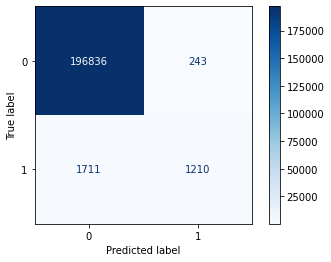

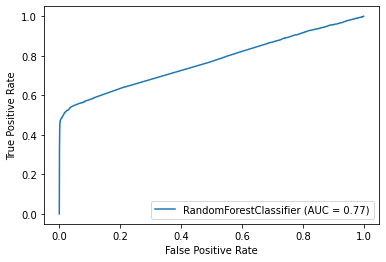

In [11]:
param = ChainMap(grid_2.best_params_, grid.best_params_)
rf = RandomForestClassifier(n_jobs=8, **param).fit(x_train, y_train)
plot_report(rf, x_test, y_test)

FDR: 0.5500348675034867

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    788528
           1       0.97      0.47      0.63     11472

    accuracy                           0.99    800000
   macro avg       0.98      0.73      0.81    800000
weighted avg       0.99      0.99      0.99    800000



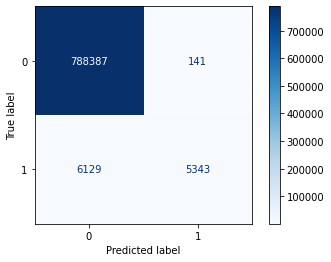

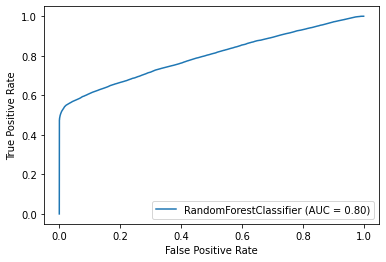

In [12]:
plot_report(rf, x_train, y_train)